In [ ]:
# Proyecto final 
# Andrea Mercado Jiménez 

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import Image
import seaborn as sns

mat_data = scipy.io.loadmat(r"C:\\Users\\andim\\OneDrive\\Escritorio\\Quinto Semestre\\Modelos Computacionales\\Coactivation_matrix.mat")
coactivation_matrix = mat_data['Coactivation_matrix']
coordinates = mat_data['Coord']

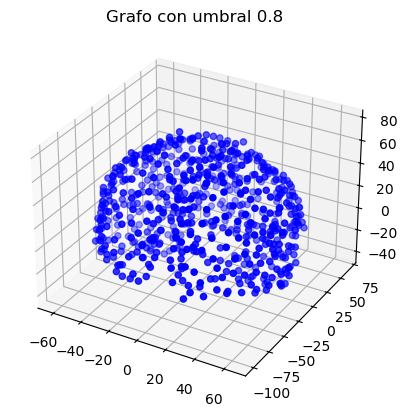

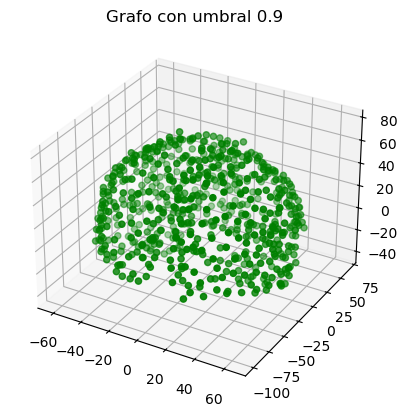

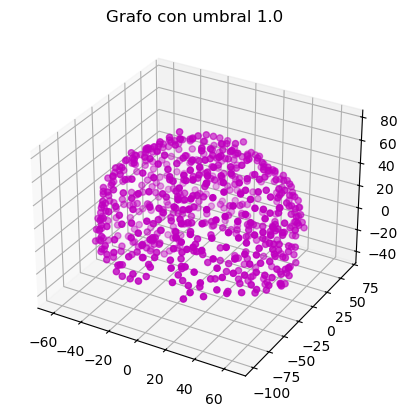

In [9]:
# 1) Definir grafos con la matriz estableciendo umbrales de coactivación de 0.8, 0.9 y 1 y graficar cada grafo. Añadir las coordenadas tridimensionales (incluidas en el archivo .mat).

colors = ['b', 'g', 'm']

# Grafos con umbral específico
def plot_graph_with_threshold(matrix, coords, threshold, color):
    G = nx.Graph()
    
    for i, (x, y, z) in enumerate(coords):
        G.add_node(i, pos=(x, y, z))
    
    for i in range(matrix.shape[0]):
        for j in range(i + 1, matrix.shape[1]):
            if matrix[i, j] >= threshold:
                G.add_edge(i, j, weight=matrix[i, j])
    
    pos = nx.get_node_attributes(G, 'pos')
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f"Grafo con umbral {threshold}")
    
    xs, ys, zs = zip(*pos.values())
    ax.scatter(xs, ys, zs, c=color, s=20, label="Nodos")
    
    for (i, j) in G.edges():
        x = [pos[i][0], pos[j][0]]
        y = [pos[i][1], pos[j][1]]
        z = [pos[i][2], pos[j][2]]
        ax.plot(x, y, z, c=color, alpha=0.6)
    
    plt.show()

for threshold, color in zip([0.8, 0.9, 1.0], colors):
    plot_graph_with_threshold(coactivation_matrix, coordinates, threshold, color)

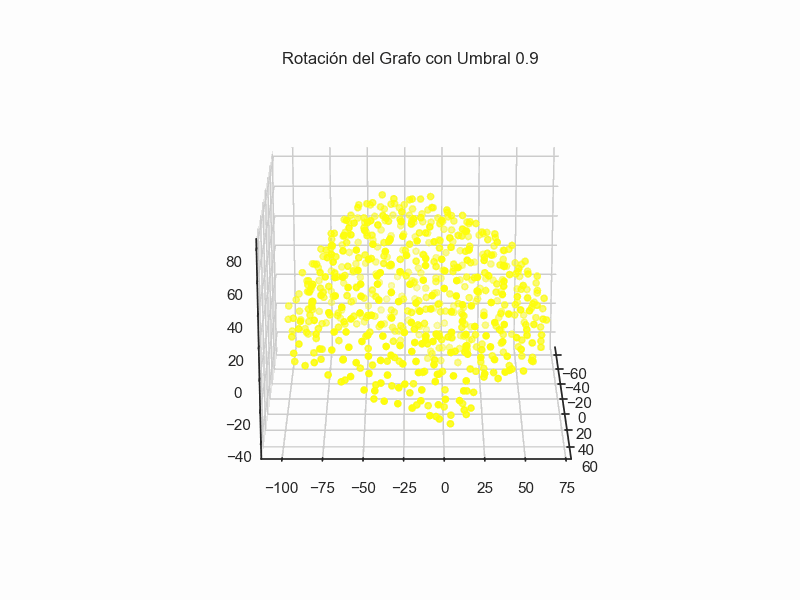

In [73]:
# 2) Con uno de los grafos en el punto uno con umbral 0.9, generar una animación donde se haga girar 360° el grafo del cerebro para visualizar las conexiones establecidas.

def create_graph_with_threshold(matrix, coords, threshold):
    G = nx.Graph()
    for i, (x, y, z) in enumerate(coords):
        G.add_node(i, pos=(x, y, z))
    for i in range(matrix.shape[0]):
        for j in range(i + 1, matrix.shape[1]):
            if matrix[i, j] >= threshold:
                G.add_edge(i, j, weight=matrix[i, j])
    return G

# Grafo con umbral de 0.9
graph = create_graph_with_threshold(coactivation_matrix, coordinates, 0.9)
pos = nx.get_node_attributes(graph, 'pos')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

def update(num):
    ax.cla()
    ax.set_title("Rotación del Grafo con Umbral 0.9")

    xs, ys, zs = zip(*pos.values())
    ax.scatter(xs, ys, zs, c='yellow', s=20, label="Nodos")

    for (i, j) in graph.edges():
        x = [pos[i][0], pos[j][0]]
        y = [pos[i][1], pos[j][1]]
        z = [pos[i][2], pos[j][2]]
        ax.plot(x, y, z, c='yellow', alpha=0.6)

    ax.view_init(elev=20., azim=num)

gif_path = r"C:\\Users\\andim\\OneDrive\\Escritorio\\Quinto Semestre\\Modelos Computacionales\\grafo_rotacion_360_amarillo.gif"
ani = FuncAnimation(fig, update, frames=range(0, 360, 5), interval=100)

plt.close(fig)
ani.save(gif_path, writer="pillow")

# Mostrar la animación
from IPython.display import Image, display
display(Image(filename=gif_path))

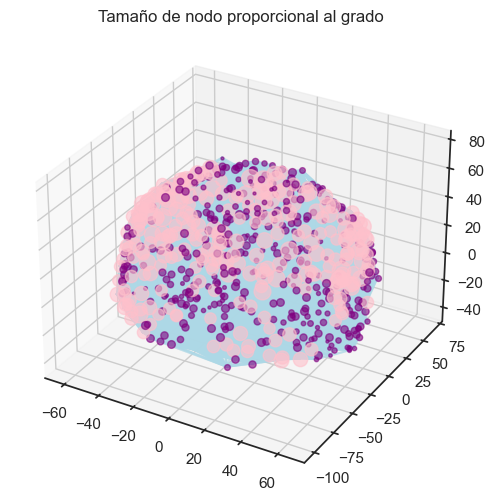

In [46]:
# 3) Encontrar los hubs del grafo, y establecer el tamaño del nodo proporcional al valor del grado.

# Crear el grafo a partir de la matriz de conectividad
graph = nx.from_numpy_array(coactivation_matrix)

# Calcular el grado de cada nodo
degree_dict = dict(graph.degree())
max_degree = max(degree_dict.values()) 

# Establecer el tamaño de cada nodo proporcional al grado
node_sizes = [degree * 100 / max_degree for degree in degree_dict.values()] 

# Identificar los hubs
average_degree = np.mean(list(degree_dict.values()))
hubs = [node for node, degree in degree_dict.items() if degree > average_degree]#faltó + 1*std

# Ajustar el tamaño de los nodos de los hubs
hub_sizes = [size * 2 for i, size in enumerate(node_sizes) if i in hubs]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Tamaño de nodo proporcional al grado")

for i, coord in enumerate(coordinates):
    color = 'pink' if i in hubs else 'purple'
    alpha = 0.6
    
    size = hub_sizes.pop(0) if i in hubs else node_sizes[i]
    
    ax.scatter(*coord, color=color, s=size, alpha=alpha)

    for j in graph.neighbors(i):
        ax.plot(*zip(coordinates[i], coordinates[j]), color='lightblue', alpha=0.5)

plt.show()

Matriz de Coactivación: (638, 638)
Coordenadas: (638, 3)
Matriz de Correlación: (638, 638)
[[ 1.          0.48849789  0.15032161  0.1685781   0.37618848]
 [ 0.48849789  1.          0.14242228  0.09521593  0.34479133]
 [ 0.15032161  0.14242228  1.          0.2855922   0.112409  ]
 [ 0.1685781   0.09521593  0.2855922   1.         -0.0181313 ]
 [ 0.37618848  0.34479133  0.112409   -0.0181313   1.        ]]


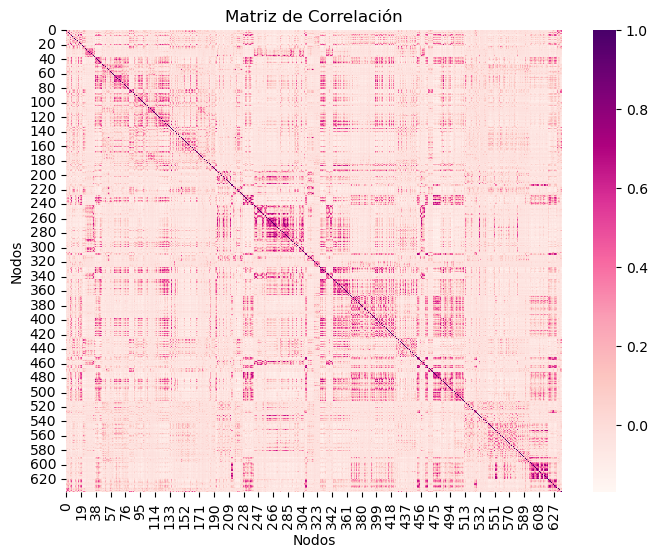

Número de nodos: 638
Número de aristas: 11598
Número de comunidades detectadas: 13
Tamaño de cada comunidad: Counter({2: 126, 1: 121, 8: 97, 5: 87, 7: 54, 4: 47, 0: 47, 9: 27, 6: 26, 10: 3, 3: 1, 11: 1, 12: 1})


<Figure size 800x600 with 0 Axes>

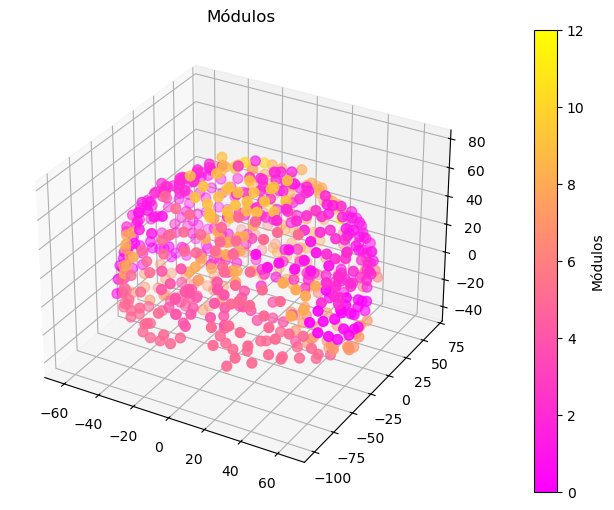

In [3]:
# 4) En función de la matriz de emparejamiento (correlación de la matriz de adyacencia), establecer una partición de los nodos en módulos. Escoger el número de módulos que creas conveniente y justificar por qué escogiste ese número.

# Verificar las dimensiones de las matrices
print(f"Matriz de Coactivación: {coactivation_matrix.shape}")
print(f"Coordenadas: {coordinates.shape}")

# Calcular la matriz de correlación
correlation_matrix = np.corrcoef(coactivation_matrix)

# Verificar un fragmento de la matriz de correlación
print(f"Matriz de Correlación: {correlation_matrix.shape}")
print(correlation_matrix[:5, :5])

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='RdPu')
plt.title('Matriz de Correlación')
plt.xlabel('Nodos')
plt.ylabel('Nodos')
plt.show()

# Definir un umbral para considerar conexiones significativas
threshold = 0.3

# Crear una matriz de adyacencia binaria basada en el umbral
adjacency_matrix = (correlation_matrix > threshold).astype(int)

G = nx.from_numpy_array(adjacency_matrix)

print(f"Número de nodos: {G.number_of_nodes()}")
print(f"Número de aristas: {G.number_of_edges()}")

# Módulos
partition = community_louvain.best_partition(G)

num_communities = len(set(partition.values()))
print(f"Número de comunidades detectadas: {num_communities}")

from collections import Counter
community_sizes = Counter(partition.values())
print("Tamaño de cada comunidad:", community_sizes)

plt.figure(figsize=(8, 6))

colors = [partition[node] for node in G.nodes()]
unique_colors = list(set(colors))
color_map = {color: idx for idx, color in enumerate(unique_colors)}
node_colors = [color_map[color] for color in colors]

unique_colors = list(set(colors))
color_map = {color: idx for idx, color in enumerate(unique_colors)}
node_colors = [color_map[color] for color in colors]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = coordinates[:, 0]
y = coordinates[:, 1]
z = coordinates[:, 2]

sc = ax.scatter(x, y, z, c=node_colors, cmap='spring', s=50)

ax.set_title('Módulos')

cb = fig.colorbar(sc, ax=ax, pad=0.1)
cb.set_label('Módulos')

plt.show()

In [ ]:
# Justificación: El número de módulos fue seleccionado considerando:
# Modularidad: El algoritmo de Louvain maximiza la modularidad, asegurando que los nodos dentro de cada módulo estén altamente conectados entre sí y débilmente conectados con otros módulos, reflejando una estructura bien definida.
# Análisis visual: Los módulos detectados coinciden con los clústeres observados en la red, validando la partición.
# Datos biológicos: Los módulos pueden representar regiones cerebrales funcionalmente similares, alineándose con redes conocidas.
# Equilibrio: El número seleccionado ofrece suficiente detalle sin dificultar la interpretación, evitando simplificaciones excesivas o particiones demasiado complejas.

C:\Users\andim\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


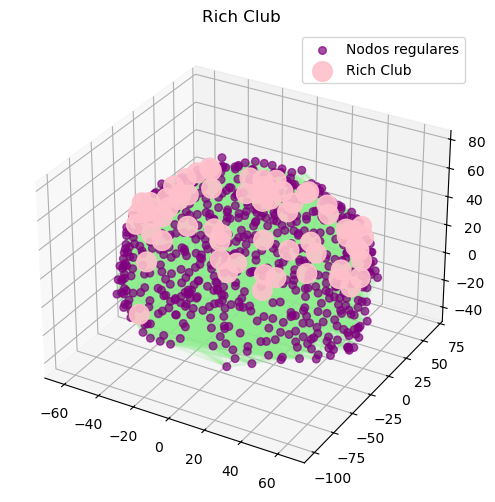

In [3]:
# 5) Determinar el conjunto del Rich Club y discutir las implicaciones anatómicas y funcionales de este grupo de nodos (mínimo 100 palabras).

# Matriz de adyacencia binaria
threshold = np.percentile(coactivation_matrix, 90) 
adj_matrix = (coactivation_matrix > threshold).astype(int)
np.fill_diagonal(adj_matrix, 0)

G = nx.from_numpy_array(adj_matrix)

# Identificar nodos del Rich Club
degrees = dict(G.degree())
degree_threshold = np.percentile(list(degrees.values()), 90)
rich_club_nodes = [node for node, degree in degrees.items() if degree >= degree_threshold]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

regular_nodes = [node for node in G.nodes() if node not in rich_club_nodes]
ax.scatter(coordinates[regular_nodes, 0], coordinates[regular_nodes, 1], coordinates[regular_nodes, 2], c='purple', label='Nodos regulares', alpha=0.7, s=30)
ax.scatter(coordinates[rich_club_nodes, 0], coordinates[rich_club_nodes, 1], coordinates[rich_club_nodes, 2], c='pink', label='Rich Club', alpha=0.9, s=200)

for edge in G.edges():
    x = coordinates[list(edge), 0]
    y = coordinates[list(edge), 1]
    z = coordinates[list(edge), 2]
    ax.plot(x, y, z, c='lightgreen', alpha=0.1)

ax.set_title('Rich Club')

plt.legend()
plt.show()

In [ ]:
# Discusión: 
# El Rich Club actúa como un centro de conectividad global, integrando señales provenientes de diversas áreas especializadas. Esto es crítico para coordinar actividades complejas y mantener la comunicación eficiente entre redes neuronales segregadas. La identificación del Rich Club en una red cerebral permite entender cómo las lesiones o enfermedades impactan la conectividad funcional y estructural, ofreciendo un marco para diseñar estrategias terapéuticas dirigidas a restaurar la eficiencia de la red cerebral.

Calculamos las propiedades del grafo original:
{'grado_medio': 58.38557993730407, 'coeficiente_de_agrupamiento': 0.3844533292242753, 'centralidad_cercania': 0.4547108341582646, 'centralidad_intermediacion': 0.0019101789247713589}
Nodos del Rich Club (grado ≥ 10): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 

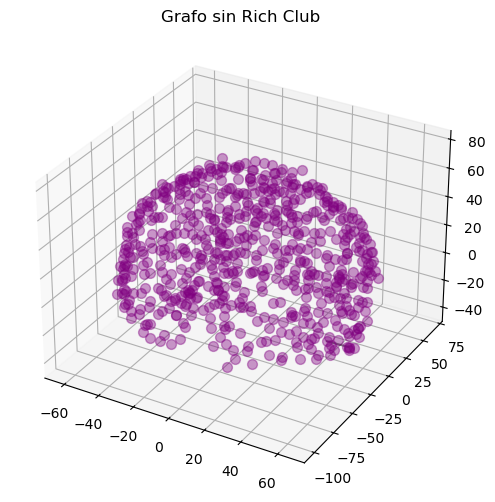

In [3]:
# 6) Supongamos que eliminamos los nodos del RichClub, describir cómo cambian las propiedades topológicas del grafo, hacer comparativas del grado, coeficiente de cluster, coeficiente de mundo pequeño y las medidas de centralidad (cercanía, intermediación)

# Calcular propiedades del grafo
def calculate_graph_properties(graph):
    degree = dict(graph.degree())
    avg_degree = np.mean(list(degree.values()))
    clustering_coefficient = nx.average_clustering(graph)
    closeness_centrality = np.mean(list(nx.closeness_centrality(graph).values()))
    betweenness_centrality = np.mean(list(nx.betweenness_centrality(graph).values()))
    
    return {
        'grado_medio': avg_degree,
        'coeficiente_de_agrupamiento': clustering_coefficient,
        'centralidad_cercania': closeness_centrality,
        'centralidad_intermediacion': betweenness_centrality
    }

# Calcular propiedades antes de eliminar nodos del Rich Club
properties_before = calculate_graph_properties(G)

# Identificar nodos del Rich Club
rich_club_nodes = [node for node, degree in G.degree() if degree >= 10]

# Eliminar nodos del Rich Club
G_reduced = G.copy()
G_reduced.remove_nodes_from(rich_club_nodes)

# Calcular propiedades después de eliminar nodos del Rich Club
properties_after = calculate_graph_properties(G_reduced)

print("Calculamos las propiedades del grafo original:")
print(properties_before)
print("Nodos del Rich Club (grado ≥ 10):", rich_club_nodes)

print("\nCalculando las propiedades del grafo sin el Rich Club:")
print(properties_after)

# Comparación de propiedades
print("\nComparación de propiedades:")
for key in properties_before.keys():
    original_value = properties_before[key]
    modified_value = properties_after[key]
    cambio = ((modified_value - original_value) / original_value) * 100 if original_value != 0 else 'N/A'
    
    print(f"{key.capitalize()}:")
    print(f"  Original: {original_value:.4f}")
    print(f"  Modificado: {modified_value:.4f}")
    print(f"  Cambio: {cambio:.2f}%" if cambio != 'N/A' else "  Cambio: N/A\n")

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

pos = coordinates[:, :3] 

for node in G.nodes():
    ax.scatter(pos[node, 0], pos[node, 1], pos[node, 2], s=50, color='purple', alpha=0.4)
    
for edge in G_reduced.edges():
    x_coords = [pos[edge[0], 0], pos[edge[1], 0]]
    y_coords = [pos[edge[0], 1], pos[edge[1], 1]]
    z_coords = [pos[edge[0], 2], pos[edge[1], 2]]
    ax.plot(x_coords, y_coords, z_coords, color='black', alpha=0.5)

ax.set_title('Grafo sin Rich Club')

plt.show()

Propiedades del grafo original:
{'grado_medio': 58.38557993730407, 'coeficiente_de_agrupamiento': 0.3844533292242753, 'centralidad_cercania': 0.4547108341582646, 'centralidad_intermediacion': 0.0019101789247713589}

Comparación de propiedades después de eliminar nodos:

Grafo sin el 10% de nodos:
Grado_medio:
  Original: 58.3856
  Modificado: 43.0817
  Cambio: -26.21%
Coeficiente_de_agrupamiento:
  Original: 0.3845
  Modificado: 0.3543
  Cambio: -7.85%
Centralidad_cercania:
  Original: 0.4547
  Modificado: 0.4307
  Cambio: -5.29%
Centralidad_intermediacion:
  Original: 0.0019
  Modificado: 0.0023
  Cambio: 21.99%

Grafo sin el 20% de nodos:
Grado_medio:
  Original: 58.3856
  Modificado: 34.1174
  Cambio: -41.57%
Coeficiente_de_agrupamiento:
  Original: 0.3845
  Modificado: 0.3494
  Cambio: -9.11%
Centralidad_cercania:
  Original: 0.4547
  Modificado: 0.4109
  Cambio: -9.64%
Centralidad_intermediacion:
  Original: 0.0019
  Modificado: 0.0028
  Cambio: 48.83%

Grafo sin el 30% de nodos:


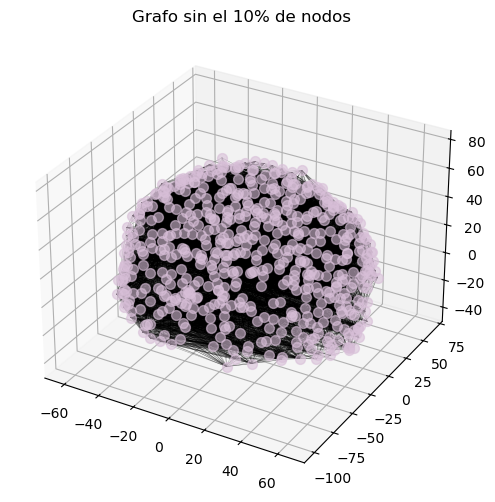

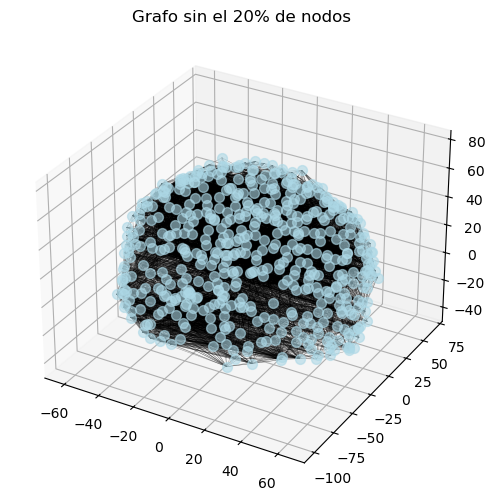

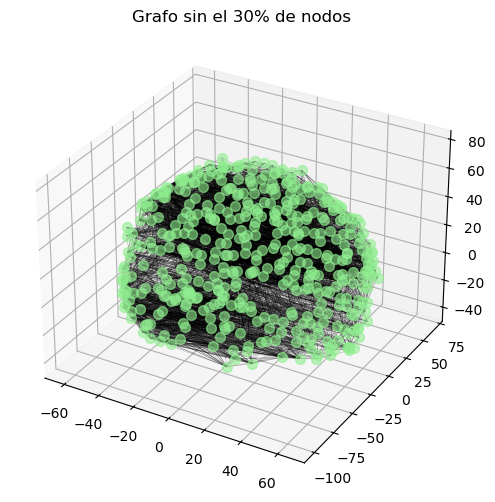

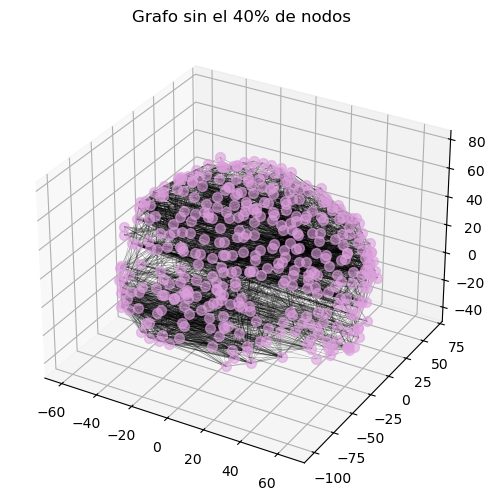

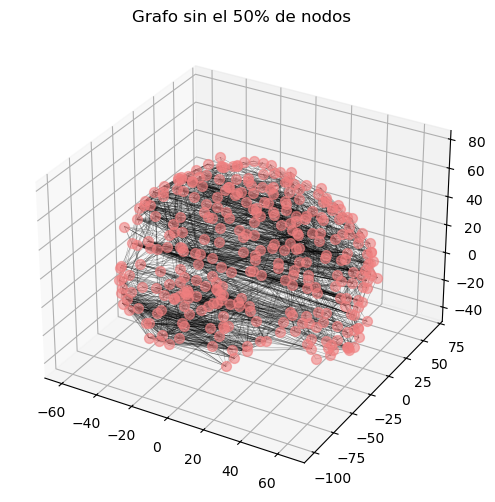

In [12]:
# 7) Quitar 10%-50% de los nodos con mayor medida de intermediación y describir cómo cambian las propiedades topológicas del grafo, hacer comparativas del grado, coeficiente de cluster, coeficiente de mundo pequeño y las medidas de centralidad (cercanía, intermediación)

# Calcular propiedades del grafo
def calculate_graph_properties(graph):
    degree = dict(graph.degree())
    avg_degree = np.mean(list(degree.values()))
    clustering_coefficient = nx.average_clustering(graph)
    closeness_centrality = np.mean(list(nx.closeness_centrality(graph).values()))
    betweenness_centrality = np.mean(list(nx.betweenness_centrality(graph).values()))
    
    return {
        'grado_medio': avg_degree,
        'coeficiente_de_agrupamiento': clustering_coefficient,
        'centralidad_cercania': closeness_centrality,
        'centralidad_intermediacion': betweenness_centrality
    }

# Propiedades comparativas
print("Propiedades del grafo original:")
print(properties_before)

print("\nComparación de propiedades después de eliminar nodos:")
for percentage in percentages_to_remove:
    num_nodes_to_remove = int(len(sorted_nodes) * percentage)
    nodes_to_remove = [node for node, _ in sorted_nodes[:num_nodes_to_remove]]

    G_reduced = G.copy()
    G_reduced.remove_nodes_from(nodes_to_remove)
    
    properties_after = calculate_graph_properties(G_reduced)
    
    print(f"\nGrafo sin el {int(percentage * 100)}% de nodos:")
    for key in properties_before.keys():
        original_value = properties_before[key]
        modified_value = properties_after[key]
        cambio = ((modified_value - original_value) / original_value) * 100 if original_value != 0 else 'N/A'
        
        print(f"{key.capitalize()}:")
        print(f"  Original: {original_value:.4f}")
        print(f"  Modificado: {modified_value:.4f}")
        print(f"  Cambio: {cambio:.2f}%" if cambio != 'N/A' else "  Cambio: N/A\n")
        
# Calcular propiedades antes de eliminar nodos
properties_before = calculate_graph_properties(G)

# Calcular la centralidad de intermediación para todos los nodos
betweenness = nx.betweenness_centrality(G)

# Ordenar los nodos por su centralidad de intermediación
sorted_nodes = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)

# Porcentajes a eliminar
percentages_to_remove = [0.1, 0.2, 0.3, 0.4, 0.5]
colors = ['thistle', 'lightblue', 'lightgreen', 'plum', 'lightcoral']

# Generar grafos eliminando nodos según los porcentajes especificados
for i, percentage in enumerate(percentages_to_remove):
    num_nodes_to_remove = int(len(sorted_nodes) * percentage)
    nodes_to_remove = [node for node, _ in sorted_nodes[:num_nodes_to_remove]]

    G_reduced = G.copy()
    G_reduced.remove_nodes_from(nodes_to_remove)

    properties_after = calculate_graph_properties(G_reduced)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    pos = coordinates[:, :3]

    for node in G_reduced.nodes():
        ax.scatter(pos[node, 0], pos[node, 1], pos[node, 2], s=50, color=colors[i], alpha=0.6)

    for edge in G_reduced.edges():
        x_coords = [pos[edge[0], 0], pos[edge[1], 0]]
        y_coords = [pos[edge[0], 1], pos[edge[1], 1]]
        z_coords = [pos[edge[0], 2], pos[edge[1], 2]]
        ax.plot(x_coords, y_coords, z_coords, color='black', linewidth=0.3, alpha=0.4)

    ax.set_title(f'Grafo sin el {int(percentage * 100)}% de nodos')

    plt.show()

Calculando las propiedades del grafo original:
{'grado_medio': 58.38557993730407, 'coeficiente_de_agrupamiento': 0.3844533292242753, 'centralidad_cercania': 0.4547108341582646, 'centralidad_intermediacion': 0.0019101789247713589}
Calculamos las propiedades del modelo nulo aleatorio:
{'grado_medio': 58.38557993730407, 'coeficiente_de_agrupamiento': 0.3844533292242753, 'centralidad_cercania': 0.4547108341582646, 'centralidad_intermediacion': 0.0019101789247713589}

Comparación de propiedades:
grado_medio:
  Original: 58.38557993730407
  Modificado: 58.38557993730407
  Cambio: 0.0

coeficiente_de_agrupamiento:
  Original: 0.3844533292242753
  Modificado: 0.3844533292242753
  Cambio: 0.0

centralidad_cercania:
  Original: 0.4547108341582646
  Modificado: 0.4547108341582646
  Cambio: 0.0

centralidad_intermediacion:
  Original: 0.0019101789247713589
  Modificado: 0.0019101789247713589
  Cambio: 0.0



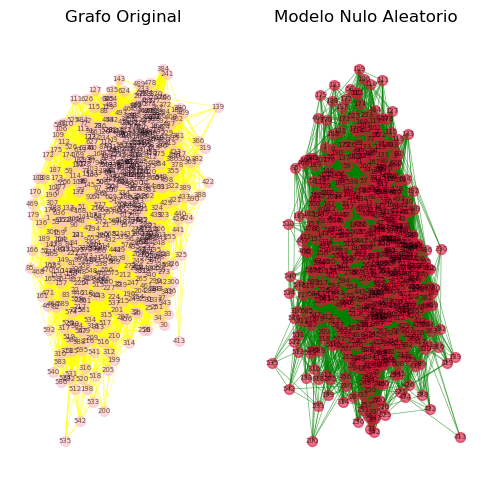

In [11]:
# 8) Generar un modelo nulo aleatorio donde se tenga el mismo número de nodos y el mismo número total de conexiones, y comparar sus propiedades con el grafo original del cerebro.

n_nodes = coactivation_matrix.shape[0]

# Crear un gráfico a partir de la matriz de coactivación
G_original = nx.from_numpy_array(coactivation_matrix)

# Generar un modelo nulo aleatorio con el mismo número de nodos y conexiones
def generate_random_null_model_same_edges(G):
    edges = list(G.edges())
    np.random.shuffle(edges)
    
    G_null = nx.Graph()
    G_null.add_nodes_from(G.nodes())
    
    G_null.add_edges_from(edges)
    
    return G_null

# Generar el modelo nulo
G_null = generate_random_null_model_same_edges(G_original)

# Calcular propiedades del grafo
def calcular_propiedades(G):
    grado_medio = np.mean([d for n, d in G.degree()])
    coeficiente_agrupamiento = nx.average_clustering(G)
    centralidad_cercania = nx.closeness_centrality(G)
    centralidad_intermediacion = nx.betweenness_centrality(G)
    
    return {
        'grado_medio': grado_medio,
        'coeficiente_de_agrupamiento': coeficiente_agrupamiento,
        'centralidad_cercania': np.mean(list(centralidad_cercania.values())),
        'centralidad_intermediacion': np.mean(list(centralidad_intermediacion.values()))
    }

# Calcular propiedades del grafo original
propiedades_original = calcular_propiedades(G_original)
print("Calculando las propiedades del grafo original:")
print(propiedades_original)

# Calcular propiedades del modelo nulo
propiedades_nulo = calcular_propiedades(G_null)
print("Calculamos las propiedades del modelo nulo aleatorio:")
print(propiedades_nulo)

# Comparación de propiedades
def comparar_propiedades(original, modificado):
    comparacion = {}
    for key in original.keys():
        cambio = modificado[key] - original[key]
        comparacion[key] = {
            'Original': original[key],
            'Modificado': modificado[key],
            'Cambio': cambio
        }
    return comparacion

comparacion_propiedades = comparar_propiedades(propiedades_original, propiedades_nulo)

print("\nComparación de propiedades:")
for key, value in comparacion_propiedades.items():
    print(f"{key}:")
    print(f"  Original: {value['Original']}")
    print(f"  Modificado: {value['Modificado']}")
    print(f"  Cambio: {value['Cambio']}\n")

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
nx.draw(G_original, with_labels=True, node_color='pink', edge_color='yellow', node_size=50, font_size=5, alpha=0.6, width=0.5)
plt.title('Grafo Original')

plt.subplot(1, 2, 2)
nx.draw(G_null, with_labels=True, node_color='crimson', edge_color='green', node_size=50, font_size=5, alpha=0.6, width=0.5)
plt.title('Modelo Nulo Aleatorio')

plt.tight_layout()
plt.show()

Calculando las propiedades del grafo original:
{'grado_medio': 58.38557993730407, 'coeficiente_de_agrupamiento': 0.3844533292242753, 'centralidad_cercania': 0.4547108341582646, 'centralidad_intermediacion': 0.0019101789247713589}
Calculamos las propiedades del modelo nulo aleatorio:
{'grado_medio': 58.38557993730407, 'coeficiente_de_agrupamiento': 0.09180515821854646, 'centralidad_cercania': 0.5229498798806951, 'centralidad_intermediacion': 0.0014344796387737177}

Comparación de propiedades:
grado_medio:
  Original: 58.38557993730407
  Modificado: 58.38557993730407
  Cambio: 0.0

coeficiente_de_agrupamiento:
  Original: 0.3844533292242753
  Modificado: 0.09180515821854646
  Cambio: -0.2926481710057288

centralidad_cercania:
  Original: 0.4547108341582646
  Modificado: 0.5229498798806951
  Cambio: 0.0682390457224305

centralidad_intermediacion:
  Original: 0.0019101789247713589
  Modificado: 0.0014344796387737177
  Cambio: -0.00047569928599764115



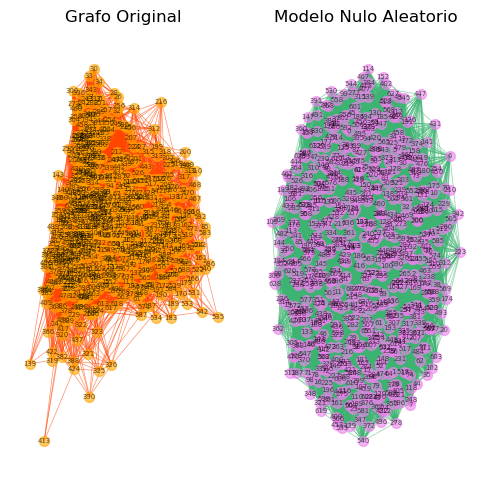

In [10]:
# 9) Generar un modelo nulo aleatorio donde se conserve la distribución de grado y comparar sus propiedades con el grafo original del cerebro.

# Definir el número de nodos
n_nodes = coactivation_matrix.shape[0]

# Crear un gráfico a partir de la matriz de coactivación
G_original = nx.from_numpy_array(coactivation_matrix)

# Generar un modelo nulo aleatorio conservando la distribución de grado
def generate_random_null_model(G):
    G_null = nx.Graph()
    G_null.add_nodes_from(G.nodes())
    
    # Conservar la distribución de grado
    degrees = [d for n, d in G.degree()]
    degree_sequence = sorted(degrees, reverse=True)
    
    # Generar un modelo nulo aleatorio
    while len(G_null.edges()) < len(G.edges()):
        u, v = np.random.choice(G.nodes(), 2, replace=False)
        
        if not G_null.has_edge(u, v):
            G_null.add_edge(u, v)
    
    return G_null

# Generar el modelo nulo
G_null = generate_random_null_model(G_original)

# Calcular propiedades del grafo
def calcular_propiedades(G):
    grado_medio = np.mean([d for n, d in G.degree()])
    coeficiente_agrupamiento = nx.average_clustering(G)
    centralidad_cercania = nx.closeness_centrality(G)
    centralidad_intermediacion = nx.betweenness_centrality(G)
    
    return {
        'grado_medio': grado_medio,
        'coeficiente_de_agrupamiento': coeficiente_agrupamiento,
        'centralidad_cercania': np.mean(list(centralidad_cercania.values())),
        'centralidad_intermediacion': np.mean(list(centralidad_intermediacion.values()))
    }

# Calcular propiedades del grafo original
propiedades_original = calcular_propiedades(G_original)
print("Calculando las propiedades del grafo original:")
print(propiedades_original)

# Calcular propiedades del modelo nulo
propiedades_nulo = calcular_propiedades(G_null)
print("Calculamos las propiedades del modelo nulo aleatorio:")
print(propiedades_nulo)

# Comparación de propiedades
def comparar_propiedades(original, modificado):
    comparacion = {}
    for key in original.keys():
        cambio = modificado[key] - original[key]
        comparacion[key] = {
            'Original': original[key],
            'Modificado': modificado[key],
            'Cambio': cambio
        }
    return comparacion

comparacion_propiedades = comparar_propiedades(propiedades_original, propiedades_nulo)

print("\nComparación de propiedades:")
for key, value in comparacion_propiedades.items():
    print(f"{key}:")
    print(f"  Original: {value['Original']}")
    print(f"  Modificado: {value['Modificado']}")
    print(f"  Cambio: {value['Cambio']}\n")

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
nx.draw(G_original, with_labels=True, node_color='orange', edge_color='orangered', node_size=50, font_size=5, alpha=0.6, width=0.5)
plt.title('Grafo Original')

plt.subplot(1, 2, 2)
nx.draw(G_null, with_labels=True, node_color='violet', edge_color='mediumseagreen', node_size=50, font_size=5, alpha=0.6, width=0.5)
plt.title('Modelo Nulo Aleatorio')

plt.tight_layout()
plt.show()

Calculando las propiedades del grafo original:
{'grado_medio': 58.38557993730407, 'coeficiente_de_agrupamiento': 0.3844533292242753, 'centralidad_cercania': 0.4547108341582646, 'centralidad_intermediacion': 0.0019101789247713589}
Calculamos las propiedades del modelo nulo con probabilidad geométrica:
{'grado_medio': 623.4169278996865, 'coeficiente_de_agrupamiento': 0.9803280637883183, 'centralidad_cercania': 0.9798121692965062, 'centralidad_intermediacion': 3.352752214170561e-05}

Comparación de propiedades:
grado_medio:
  Original: 58.38557993730407
  Modificado: 623.4169278996865
  Cambio: 565.0313479623824

coeficiente_de_agrupamiento:
  Original: 0.3844533292242753
  Modificado: 0.9803280637883183
  Cambio: 0.5958747345640429

centralidad_cercania:
  Original: 0.4547108341582646
  Modificado: 0.9798121692965062
  Cambio: 0.5251013351382416

centralidad_intermediacion:
  Original: 0.0019101789247713589
  Modificado: 3.352752214170561e-05
  Cambio: -0.0018766514026296534



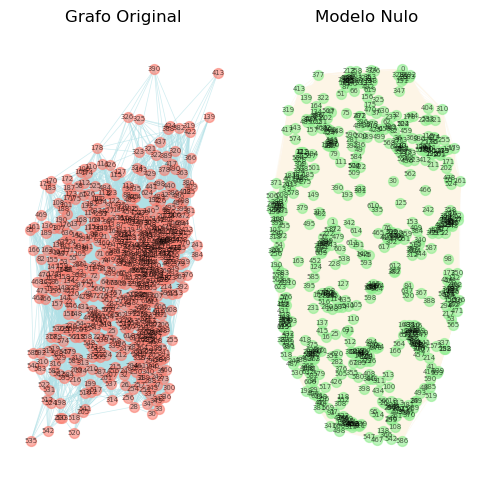

In [6]:
# 10) Generar un modelo nulo utilizando una probabilidad de conexión en función de la distancia geométrica, con el mismo número de nodos y conexiones y compara sus propiedades y discutir la importancia de las conexiones a larga distancia en el cerebro.

# Número de nodos
n_nodes = coactivation_matrix.shape[0]

# Crear gráfico a partir de la matriz de coactivación
G_original = nx.from_numpy_array(coactivation_matrix)

# Calcular la distancia geométrica entre nodos
pos = nx.spring_layout(G_original)
distances = np.zeros((n_nodes, n_nodes))

for i in range(n_nodes):
    for j in range(n_nodes):
        distances[i, j] = np.linalg.norm(pos[i] - pos[j])

# Generar un modelo nulo basado en la distancia
def generate_null_model(n_nodes, distances):
    G_null = nx.Graph()
    G_null.add_nodes_from(range(n_nodes))
    
    for i in range(n_nodes):
        for j in range(i + 1, n_nodes):
            prob = 1 / (distances[i, j] + 1e-6)
            if np.random.rand() < prob:
                G_null.add_edge(i, j)
    
    return G_null

# Generar el modelo nulo
G_null = generate_null_model(n_nodes, distances)

# Calcular propiedades del grafo
def calcular_propiedades(G):
    grado_medio = np.mean([d for n, d in G.degree()])
    coeficiente_agrupamiento = nx.average_clustering(G)
    centralidad_cercania = nx.closeness_centrality(G)
    centralidad_intermediacion = nx.betweenness_centrality(G)
    
    return {
        'grado_medio': grado_medio,
        'coeficiente_de_agrupamiento': coeficiente_agrupamiento,
        'centralidad_cercania': np.mean(list(centralidad_cercania.values())),
        'centralidad_intermediacion': np.mean(list(centralidad_intermediacion.values()))
    }

# Calcular propiedades del grafo original
propiedades_original = calcular_propiedades(G_original)
print("Calculando las propiedades del grafo original:")
print(propiedades_original)

# Calcular propiedades del modelo nulo
propiedades_nulo = calcular_propiedades(G_null)
print("Calculamos las propiedades del modelo nulo con probabilidad geométrica:")
print(propiedades_nulo)

# Comparación de propiedades
def comparar_propiedades(original, modificado):
    comparacion = {}
    for key in original.keys():
        cambio = modificado[key] - original[key]
        comparacion[key] = {
            'Original': original[key],
            'Modificado': modificado[key],
            'Cambio': cambio
        }
    return comparacion

comparacion_propiedades = comparar_propiedades(propiedades_original, propiedades_nulo)

print("\nComparación de propiedades:")
for key, value in comparacion_propiedades.items():
    print(f"{key}:")
    print(f"  Original: {value['Original']}")
    print(f"  Modificado: {value['Modificado']}")
    print(f"  Cambio: {value['Cambio']}\n")

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
nx.draw(G_original, pos, with_labels=True, node_color='salmon', edge_color='powderblue', node_size=50, font_size=5, alpha=0.6, width=0.5) 
plt.title('Grafo Original')

plt.subplot(1, 2, 2)
pos_null = nx.spring_layout(G_null)
nx.draw(G_null, pos_null, with_labels=True, node_color='lightgreen', edge_color='oldlace', node_size=50, font_size=5, alpha=0.6, width=0.5)
plt.title('Modelo Nulo')

plt.tight_layout()
plt.show()

In [ ]:
# 11) Escribir una reseña de lo aprendido en el curso, incluyendo la importancia de conocer herramientas de teoría de grafos para comprender la conectividad del cerebro (mínimo 200 palabras).

# En el curso, aprendí que la teoría de grafos es escencial para analizar y comprender la conectividad cerebral. Permite modelar la estructura y organización de redes neuronales, lo cual es crucial para estudiar como las diferentes partes del cerebro interactúan entre si para procesar información de manera eficiente. Los conceptos de la teoría de grafos, como el coeficiente de cluster, nos ayudan a identificar la densidad de conexiones dentro de un grupo de nodos y a entender cómo ciertos grupos pueden estar más conectados entre sí que con otros, lo que es relevante en áreas como la corteza cerebral. 

# El concepto de mundo pequeño describe como el cerebro logra un equilibrio entre conectividad y eficiencia al tener cortos caminos de comunicación entre neuronas, mientras mantiene una red altamente interconectada. Esto es fundamental para el procesamiento rápido y eficiente de la información, lo cual se ha observa en el cerebro humano y en muchas redes neuronales. 

# Por otro lado, los hubs o nodos centrales, que son neuronas con un alto grado de conectividad, juegan un papel fundamental en la organización y la estabilidad de la red neuronal. Estas neuronas permiten la comunicación entre diferentes áreas y favorecen una distribución de la información que optimizan el procesamiento cerebral. La teoría de grafos también nos permite explorar la robustez y vulnerabilidad de estas redes, lo cual es importante para entender los efectos de lesiones o enfermedades neurológicas. 

# La teoría de grafos nos ayuda a estudiar las redes neuronales del cerebro, aportando herramientas que revelan patrones de conectividad esenciales para el funcionamiento cerebral y ayudando a entender el cerebro desde una perspectiva estructural y funcional.  